### Column Description

| Variável 	| Descrição 	|
|:-:	|:-	|
| PassangerID 	| ID de identificação do passageiro(a) 	|
| Survived 	| se o passageiro(a) sobreviveu (0 = não, 1 = sim) 	|
| Pclass 	| classe do passageiro:<br>     * **1 = primeira**,<br>     * **2 = segunda**,<br>     * **3 = terceira** 	|
| name 	| nome do passageiro(a) 	|
| sex 	| sexo do passageiro(a) 	|
| age 	| idade do passageiro(a) 	|
| Sibsp 	| número de irmão(ãs)/esposo(a) à bordo 	|
| Parch 	| número de pais/filhos(as) à bordo 	|
| Ticket 	| número da passagem 	|
| Fare 	| preço da passagem 	|
| Cabin 	| cabine 	|
| Embarked 	| local que o passageiro(a) embarcou:<br>     * **C = Cherboug**,<br>     * **Q = Queenstown**,<br>     * **S = Southamption** 	|
| WikiId 	| ID de identificação do passageiro(a) segundo Wikipedia 	|
| Name_wiki 	| nome do passageiro(a) 	|
| Age_wiki 	| idade do passageiro(a) 	|
| Hometown 	| cidade de nascimento do passageiro(a) 	|
| Boarded 	| cidade de embarque 	|
| Destination 	| destino da viagem 	|
| Lifeboat 	| identificação do bote salva-vidas 	|
| Body 	| número de identificação do corpo 	|


<font color='red'>**IMPORTANT**</font>

The new features (the ones after 'Embarked') are very similar to the original ones but they are more up-to-date and have much fewer missing values. Therefore, users can decide on the preferred features themselves.

### Intalling libs

In [1]:
#pip install missingno

### Importing Libs

In [21]:
# data visualization
%matplotlib inline
import matplotlib.pyplot as plt

# data manipulation
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

# missing values
import missingno as msno

from sklearn.impute import (
    SimpleImputer
)

# machine learning models
from sklearn import (
    ensemble,
    preprocessing,
    tree,
    impute,
    model_selection
)

from sklearn.dummy import (
    DummyClassifier
)

from sklearn.model_selection import (
    train_test_split
)

from sklearn.experimental import (
    enable_iterative_imputer
)

from sklearn.linear_model import (
    LogisticRegression
)

from sklearn.tree import (
    DecisionTreeClassifier
)

from sklearn.neighbors import (
    KNeighborsClassifier
)

from sklearn.naive_bayes import (
    GaussianNB
)

from sklearn.svm import (
    SVC
)

from sklearn.ensemble import (
    RandomForestClassifier
)

import xgboost

# data model metrics
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score
)

from yellowbrick.classifier import (
    ConfusionMatrix
)

from yellowbrick.model_selection import (
    LearningCurve
)

# data prep-model
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    learning_curve
)

# model deploy
import pickle

### Reading the Titanic Dataset

In [3]:
df = pd.read_csv("titanic_dataset.csv", index_col=0)
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


# Missing Values
Handling missing data is one of the main steps in preparing data and understanding it before starting to develop predictions.

<div class="alert alert-block alert-warning">
<b>Alert:</b> The vast majority of algorithms will not work with missing data.
<div class="alert alert-block alert-info">
<b>Note:</b> Exceptions like XGBOOST, CatBoost, and LightGBM.<br> As with many questions in Machine Learning, there are no single answers or rules on how to handle missing data.
</div> 
</div>

## There are several ways to deal with missing data:
- remove any row with missing data;
- remove any columns with missing data;
- impute given to missing values;
- create a column to report that data was missing;
- and so on;

<div class="alert alert-block alert-info">
<b>Note:</b> We will delete some repeated columns from our dataset. Remembering that the database offers the original data and some more updated data, originating from Wikipedia about the Titanic passengers.
</div>

But first, we will convert DataFrame column names to lowercase snake case

In [4]:
# converting DataFrame column names to lowercase snake case
df.columns = (df.columns
                .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                .str.lower()
             )

df = df.drop(columns = ["wiki_id", "name", "age"])

## Analyzing missing data

### Percentage of missing data in our database

In [5]:
df.isnull().mean() * 100

survived       31.932773
pclass          0.000000
sex             0.000000
sib_sp          0.000000
parch           0.000000
ticket          0.000000
fare            0.076394
cabin          77.463713
embarked        0.152788
name_wiki       0.381971
age_wiki        0.534759
hometown        0.381971
boarded         0.381971
destination     0.381971
lifeboat       61.650115
body           90.068755
class           0.381971
dtype: float64

### We can use the missingno lib to identify non-random patterns of missing data

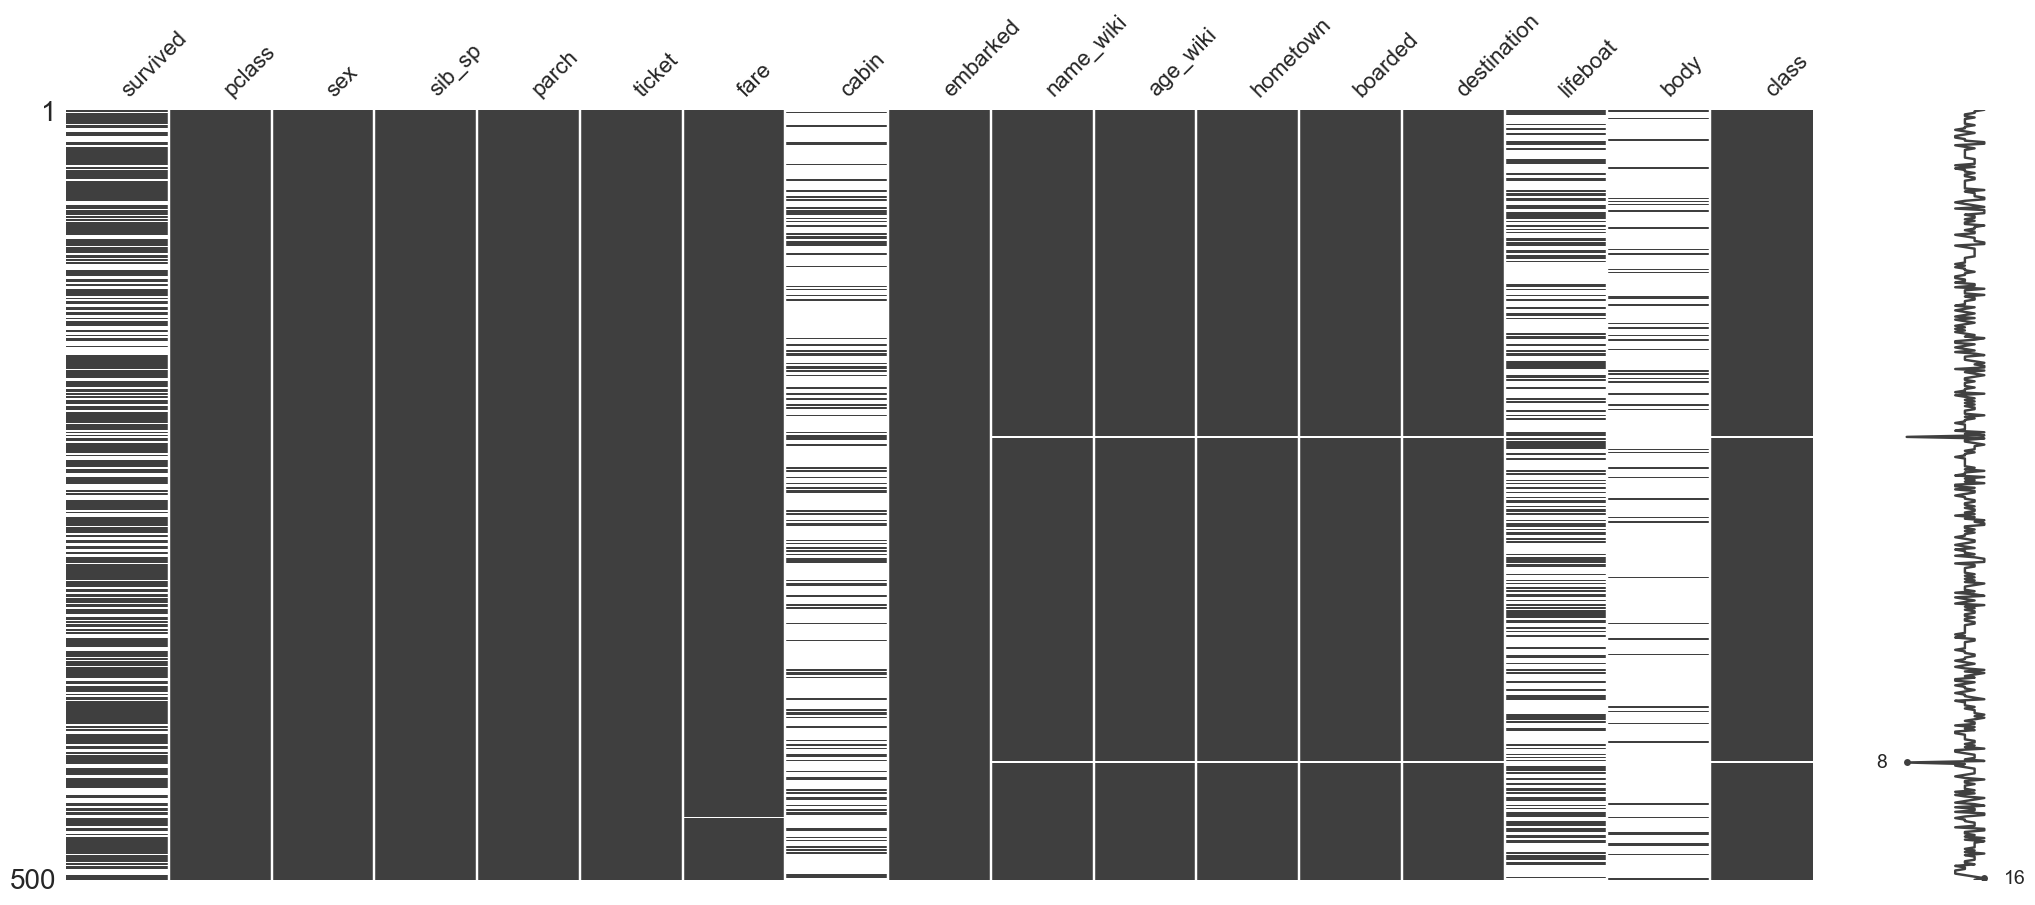

In [6]:
# matrix visualization
ax = msno.matrix(df.sample(500))

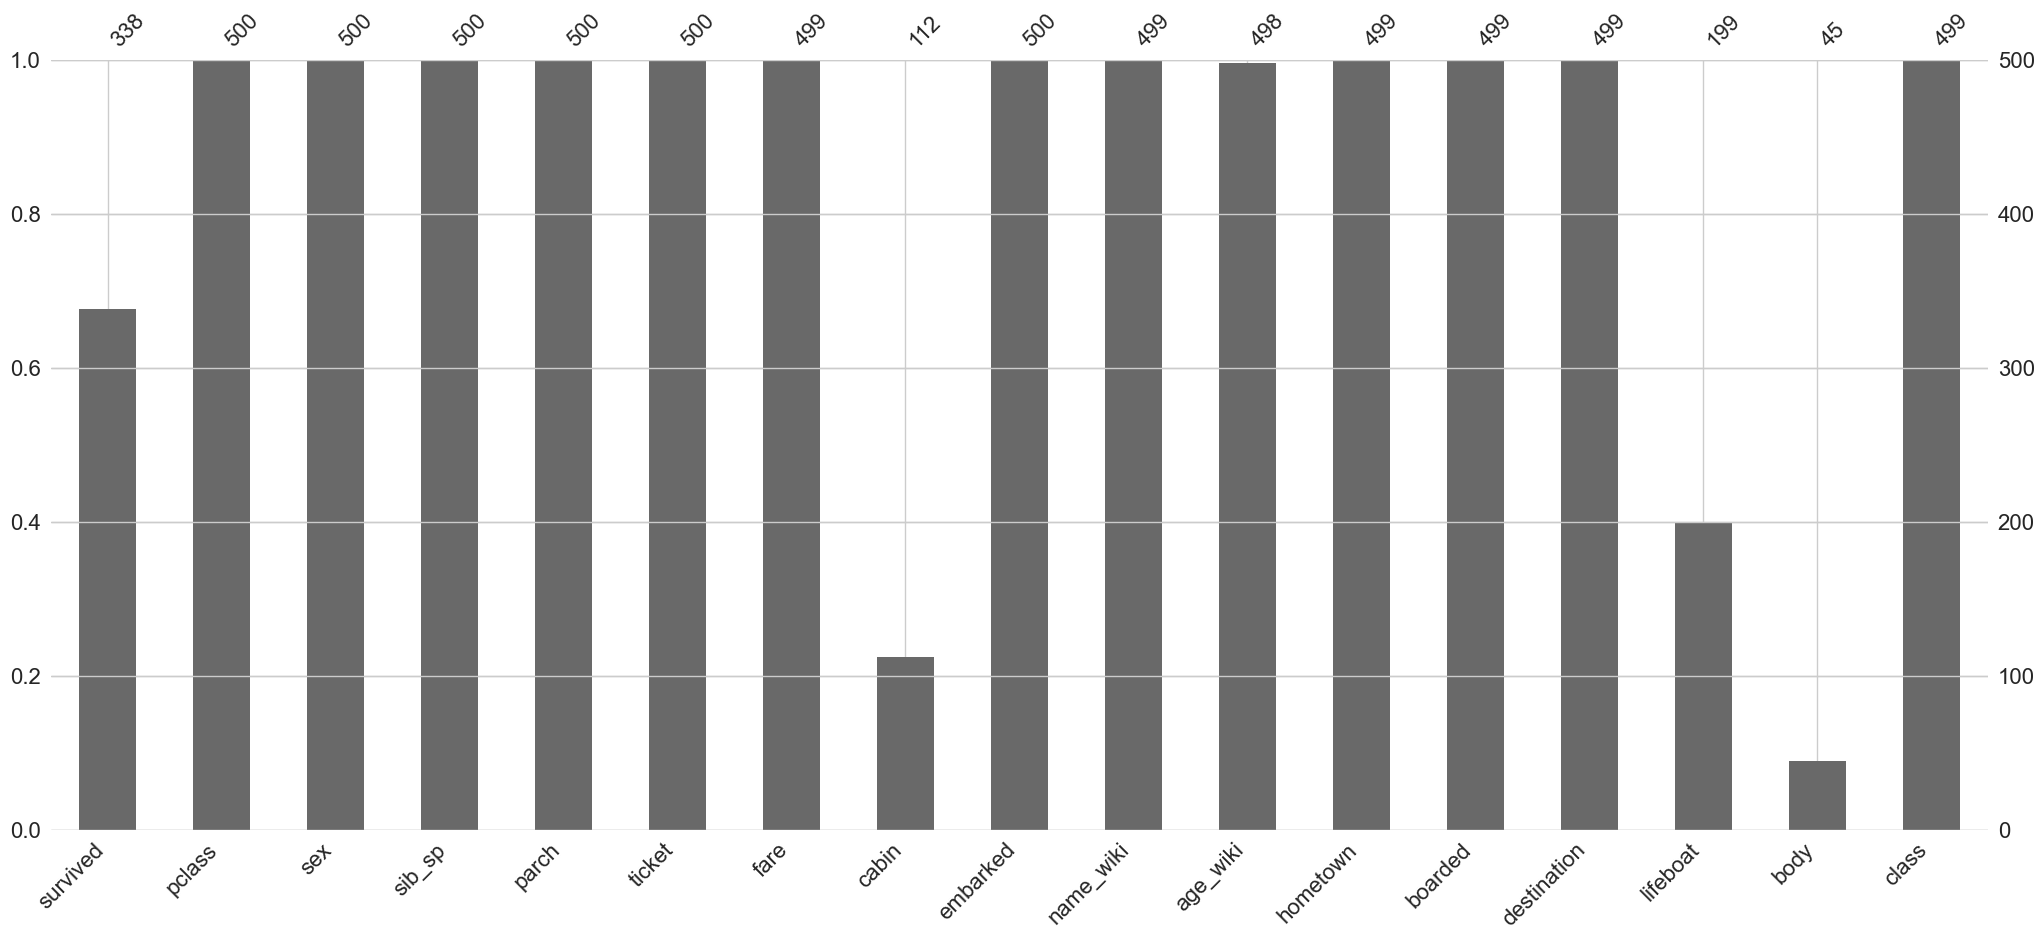

In [7]:
# bar visualization
ax = msno.bar(df.sample(500))

__As we can see in both graphs, it does not appear to have missing values pattern.__

<div class="alert alert-block alert-info">
<b>Note:</b> Heat maps can be used to check correlations between features.
</div>

#### We will use the same lib as before, analysing the missing data correlation.

But first, let's try the heatmap graph with only missing value variables.

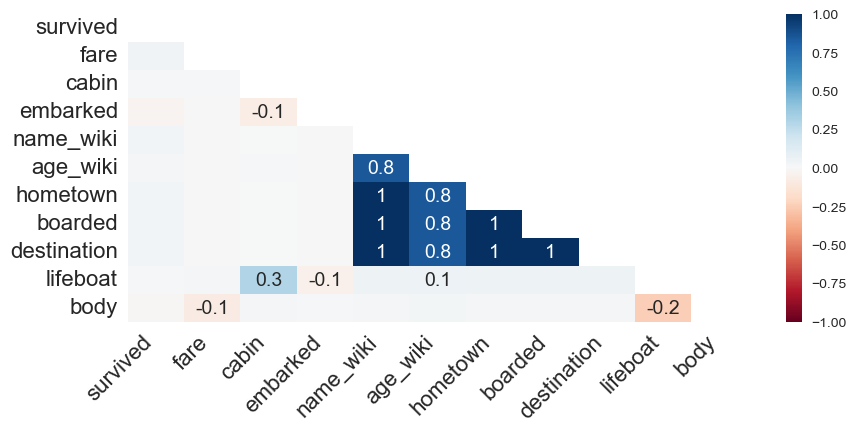

In [13]:
# dropping non-missing value variables
df_heatmap = df.drop(columns = ["pclass", "sex", "sib_sp", "parch", "ticket", "class"])

# heatmap visualization
ax = msno.heatmap(df_heatmap, figsize = (10, 4))

### Dropping missing data
Pandas lib is able to handle missing values

<div class="alert alert-block alert-warning">
<b>Alert:</b> We must be careful when dropping data. In general, we can use this option as a last resource.
</div>

#### To drop all rows with missing data we can use the .dropna() method

In [18]:
df_rows = df.dropna()
df_rows.head(5)

,survived,pclass,sex,sib_sp,parch,ticket,fare,cabin,embarked,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,body,class
PassengerId,,,,,,,,,,,,,,,,,


__Note that when performing the above method, we dropped our entire dataset.<br> 
This implies that every row in our dataset has a missing record in some column.__

#### To drop columns, we can observe which one has missing values to use .drop() method on them. For this method, we need to pass which column we want to drop.

In [19]:
df_columns = df.drop(columns = 'cabin')
df_columns

,survived,pclass,sex,sib_sp,parch,ticket,fare,embarked,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,body,class
PassengerId,,,,,,,,,,,,,,,,
1,0.0,3,male,1,0,A/5 21171,7.2500,S,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
2,1.0,1,female,1,0,PC 17599,71.2833,C,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
3,1.0,3,female,0,0,STON/O2. 3101282,7.9250,S,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
4,1.0,1,female,1,0,113803,53.1000,S,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
5,0.0,3,male,0,0,373450,8.0500,S,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,male,0,0,A.5. 3236,8.0500,S,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1306,NaN,1,female,0,0,PC 17758,108.9000,C,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1307,NaN,3,male,0,0,SOTON/O.Q. 3101262,7.2500,S,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0


#### Another wy to drop columns is to use .dropna() passing axis = 1 as parameter. As we remember, this method will delete all columns that have at least one missing record.

In [20]:
df_columns2 = df.dropna(axis = 1)
df_columns2

,pclass,sex,sib_sp,parch,ticket
PassengerId,,,,,
1,3,male,1,0,A/5 21171
2,1,female,1,0,PC 17599
3,3,female,0,0,STON/O2. 3101282
4,1,female,1,0,113803
5,3,male,0,0,373450
...,...,...,...,...,...
1305,3,male,0,0,A.5. 3236
1306,1,female,0,0,PC 17758
1307,3,male,0,0,SOTON/O.Q. 3101262


### Imputing missing data
Once we have a data prediction tool, we can use it to predict values in case of missing data.<br>

To impute the data, we need to create a pipeline that will use the same logic on both model (X) and prediction (y) data.<br>

The scikit-learn __SimpleImputer__ class will work with the mean, median and most frequent values of attributes:
- strategy = mean;          -> requires numeric data
- strategy = median;        -> requires numeric data
- strategy = most_frequent; -> can be used for numeric or string data
- strategy = constant;      -> can be used for numeric or string data

In [30]:
# applying SimpleImputer on dataset columns
num_cols = df.select_dtypes(
    include = "number"
).columns
im = SimpleImputer()  
imputed = im.fit_transform(df[num_cols])

<div class="alert alert-block alert-info">
<b>Note:</b> We can use Pandas .fillna() method to impute missing data.
</div>